This notebook follows the notebook on the estimation of the Heat Loss Coefficient by linear regression.

## Energy signature method

The energy signature method relates the energy use of a dwelling to the environmental parameters,
typically the outdoor temperatures. This method can be considered as a special case of linear
regression analysis.

The indoor temperature is assumed to be quasi-constant, so that heating only is needed when the
outdoor temperature $T_e$ is lower than this base temperature $T_b$. The thermal power for heating the building
is then:

$$ \Phi_h = H (T_b-T_e) \quad \mathrm{if} \quad T_e < T_b $$
$$ \Phi_h = 0 \quad \mathrm{if} \quad T_e \geq T_b $$

<img src='images/energy_signature.png' width=250 />



In the energy signature method, the solar aperture is supposed known. We estimate $H$ along with the base temperature $T_b$. The first thing to do is define a function that outputs heating power as a function of outdoor temperature, HLC and $T_b$. This is more complicated than linear regression since there is no linear relationship between $\Phi_h$ and the base temperature $T_b$.

## Case study

We are considering data from 2 commercial buildings recorded during 3 years, from 2010 to 2012. The data is: outdoor temperature and total electrical power, averaged over periods of 3 days. Here is a sample of the data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

data_ = pd.read_excel('data/energy_signature.xlsx',
                      sheet_name = "Building 1 - 2010",
                      encoding="ISO-8859-1")

data_.head()

,Date,T (C),Power (kW)
0,2010-01-01,2.940738,26.741667
1,2010-01-04,1.987936,43.530556
2,2010-01-07,-0.052153,41.293056
3,2010-01-10,2.491137,36.495833
4,2010-01-13,7.117001,35.536111


In our case, the recorded power is the total electricity consumption of each building rather than heating power only. We assume that this consumption is the sum of the heating power $\Phi_h$ and a constant base consumption $\alpha$:

$$ \Phi = \Phi_h + \alpha$$

We have also modified the energy signature model shown above, to account for an increased electricity consumption in summer due to air conditioning. Below is the function that evaluates $\Phi$ if the parameters of the ES model are known.

In [3]:
T = data_['T (C)']
P = data_['Power (kW)']

# Definition of the evaluation function, which returns the electrical power as a function of the outdoor temperature
def signature(T, alpha, beta1, beta2, tau1, tau2):
    Phi = alpha * np.ones_like(T)

    mask1 = T < tau1
    Phi[mask1] += beta1 * (tau1-T[mask1])

    mask2 = T > tau2
    Phi[mask2] += beta2 * (T[mask2]-tau2)

    return Phi

Now that this evaluation function is defined, we can use it in a curve fitting algorithm which will find the optimal parameters to match a given dataset. These parameters are saved in the `popt` object below.

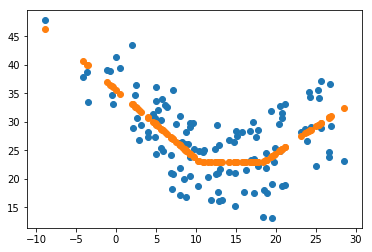

In [4]:
from scipy.optimize import curve_fit

theta_init = [20, 1.5, 1.5, 10, 20]
popt, pcov = curve_fit(signature,
                       xdata = data_['T (C)'],
                       ydata = data_['Power (kW)'],
                       p0 = theta_init)

P_opt = signature(T, popt[0], popt[1], popt[2], popt[3], popt[4])

plt.figure()
plt.scatter(T, P)
plt.scatter(T, P_opt)
plt.show()

The next block compares the real and computed electricity consumption, as a way to validate the model

In [ ]:
consumption_real = P.sum()*24*3
consumption_calc = P_opt.sum()*24*3

print('Real electricity consumption over 1 year of measurements: %.2f kWh' % consumption_real)
print('Computed consumption: %.2f kWh' % consumption_calc)

## Exercise

- Fit an energy signature model on all 6 datasets available and find the values of HLC and base temperature for the buildings
- Use a model fitted in 2010 or 2011 to predict the energy consumption of 2012.